In [1]:
from architectures.sample_conv import ConvNetMNIST, ConvNetCIFAR
from attacks.system_under_attack import multiattack
from data_eng.dataset_loader import load_MNIST, load_imagenette, load_CIFAR10
import torch
from data_eng.io import load_model
from evaluation.visualization import plot_attacked_images
import matplotlib.pyplot as plt
from attacks.white_box import PGD, FGSM, FFGSM, OnePixel, get_all_white_box_attack


In [2]:
# prepare config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_SAVE_PATH = './models/cnn-mnist.pt'

In [3]:
# prepare model and data
model = load_model(ConvNetMNIST().to(device), MODEL_SAVE_PATH)
_, test_loader = load_MNIST(batch_size=1)

In [4]:
# attack 
multiattack_result = multiattack(
    get_all_white_box_attack(model), test_loader, device)


PROCESSING ATTACKS...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.87it/s]



************* RESULTS *************


SAMPLES: 1

APGD        acc: 0.0%   prec: 0.0%  rec: 0.0%   f1: 0.0%    time: 1604.31ms/img
APGDT       acc: 0.0%   prec: 0.0%  rec: 0.0%   f1: 0.0%    time: 2.00ms/img
BIM         acc: 0.0%   prec: 0.0%  rec: 0.0%   f1: 0.0%    time: 21.61ms/img
CW          acc: 100.0% prec: 10.0% rec: 10.0%  f1: 10.0%   time: 345.96ms/img
DeepFool    acc: 0.0%   prec: 0.0%  rec: 0.0%   f1: 0.0%    time: 2.00ms/img
DIFGSM      acc: 100.0% prec: 10.0% rec: 10.0%  f1: 10.0%   time: 23.06ms/img
EADEN       acc: 0.0%   prec: 0.0%  rec: 0.0%   f1: 0.0%    time: 1412.99ms/img
EADL1       acc: 0.0%   prec: 0.0%  rec: 0.0%   f1: 0.0%    time: 774.55ms/img
EOTPGD      acc: 100.0% prec: 10.0% rec: 10.0%  f1: 10.0%   time: 33.11ms/img
FAB         acc: 100.0% prec: 10.0% rec: 10.0%  f1: 10.0%   time: 237.82ms/img
FFGSM       acc: 0.0%   prec: 0.0%  rec: 0.0%   f1: 0.0%    time: 3.00ms/img
FGSM        acc: 100.0% prec: 10.0% rec: 10.0%  f1: 10.0%   time: 1.51ms/img
GN       

TypeError: 'Axes' object is not subscriptable

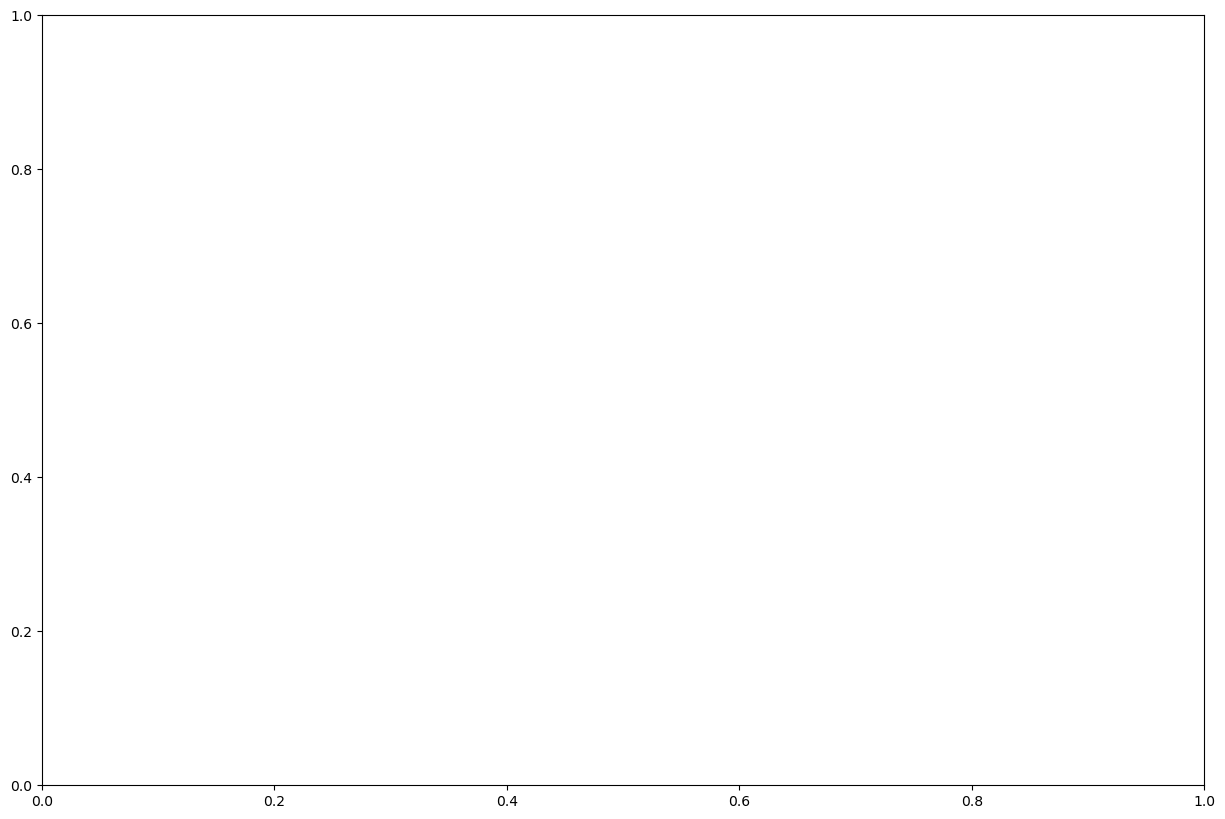

In [5]:
# visualize

plot_attacked_images(multiattack_result.attack_results, multiattack_result.adv_images, multiattack_result.eval_scores)

In [11]:
import time

In [ ]:

start = time.time()
a = 0
for i in range(100000000):
    a += 1
    
end = time.time()

print((end-start)*1000)